## Further Pandas: Data Wrangling and Visualization
Data Munging or Data Wrangling: i.e. cleaning and manipulating datasets so they are fit for analysis

We are going to work with an example dataset, which is a simplified version of aggregated data you might derive from international education databases such as TIMSS (https://timss2019.org/international-database/) or PISA (https://www.oecd.org/pisa/data/2018database/). 

__Please note that this is mainly for training purposes and doesn’t reflect actual achievement in the countries included.__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Set path to toy education outcomes dataset

path = r'https://raw.githubusercontent.com/worldbank/Python-for-Data-Science/master/June_2021_ETEC/day_2/data/data_edu.csv'

In [3]:
# Read data from csv file into dataframe

df = pd.read_csv(path, encoding = 'utf_8')

In [4]:
# Examine first two observations

df.head(2)

,country_id,country,country_school_id,country_student_id,student_gender,computer_at_home,internet_at_home,immigration_status,early_education,repeated_grades,school_location,school_type,school_size,class_size,socioeconomic_index,math_score,reading_score,parent_education
0,Argentina,Argentina,3200001,3213049,Female,No,Yes,First-Generation,Attended ECEC for at least two but less than t...,Repeated a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-1.3730,314.25031,424.07239,"Post secondary, non-tertiary"
1,Argentina,Argentina,3200001,3203374,Female,Yes,Yes,Native,Attended ECEC for at least two but less than t...,Did not repeat a grade,A city (100 000 to about 1 000 000 people),Public,570,31-35 students,-1.1825,356.07629,380.26309,"Post secondary, non-tertiary"


In [5]:
# Examine dataframe columns

df.columns

Index(['country_id', 'country', 'country_school_id', 'country_student_id',
       'student_gender', 'computer_at_home', 'internet_at_home',
       'immigration_status', 'early_education', 'repeated_grades',
       'school_location', 'school_type', 'school_size', 'class_size',
       'socioeconomic_index', 'math_score', 'reading_score',
       'parent_education'],
      dtype='object')

#### 1. Handle missing values (We covered this before)

In [6]:
# Missing values for each column

df.isnull().sum()

country_id                0
country                   0
country_school_id         0
country_student_id        0
student_gender            0
computer_at_home        432
internet_at_home        432
immigration_status        0
early_education           0
repeated_grades           0
school_location         886
school_type               0
school_size               0
class_size             1002
socioeconomic_index     833
math_score                0
reading_score             0
parent_education          0
dtype: int64

In [7]:
# But there are other values like "No Response" and "Invalid" that are not currently counted as None or Null: 

df.school_size.value_counts()

Invalid        11986
No Response     2222
322              176
392              170
350              157
               ...  
22                 2
8                  2
40                 2
54                 1
39                 1
Name: school_size, Length: 863, dtype: int64

One way of re-assigning these values as null:

```
df.loc[(df["school_size"] == "No Response")|(df["school_size"] == "Invalid"),"school_size"] = np.nan
df.school_size.isna().sum()
```

In [8]:
# To assign all null equivalents as None:

# List of all columns
all_columns = df.columns.tolist()

# List of values that we want to re-assign as None: 
list_of_null_equivalents = ["No Response", "Invalid", np.nan, "None", "Non Response"]

# Treat all columns where null equivalents exist
for col in all_columns:
    df.loc[df[col].isin(list_of_null_equivalents),col] = None # Homework: Look up how you can select data with ".loc" and ".iloc"

In [9]:
# Many more columns have null values

df.isnull().sum()

country_id                 0
country                    0
country_school_id          0
country_student_id         0
student_gender             0
computer_at_home        1121
internet_at_home        1051
immigration_status      9032
early_education        10733
repeated_grades        13513
school_location         6989
school_type             6820
school_size            14208
class_size              1834
socioeconomic_index      833
math_score                 0
reading_score              0
parent_education         413
dtype: int64

#### Decide what steps to take, eg:
* deduce the missing values (eg. internet_at_home from socioeconomic index)
* fill NaNs using mean, median or a custom strategy (Look up: df.fillna?)
* drop rows with missing values (Look up: df.dropna?)

In [10]:
# check how a method works and what parameters it needs

df.fillna?

Signature:
df.fillna(
    value=None,
    method=None,
    axis=None,
    inplace=False,
    limit=None,
    downcast=None,
) -> Union[ForwardRef('DataFrame'), NoneType]
Docstring:
Fill NA/NaN values using the specified method.

Parameters
----------
value : scalar, dict, Series, or DataFrame
    Value to use to fill holes (e.g. 0), alternately a
    dict/Series/DataFrame of values specifying which value to use for
    each index (for a Series) or column (for a DataFrame).  Values not
    in the dict/Series/DataFrame will not be filled. This value cannot
    be a list.
method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
    Method to use for filling holes in reindexed Series
    pad / ffill: propagate last valid observation forward to next valid
    backfill / bfill: use next valid observation to fill gap.
axis : {0 or 'index', 1 or 'columns'}
    Axis along which to fill missing values.
inplace : bool, default False
    If True, fill in-place. Note: this will modify any

In [11]:
# What happens if we drop all rows with Null values? 

print('original shape: ', df.shape)

print('new shape: ', df.dropna().shape) # NOTE: here, inplace = False by default

original shape:  (50397, 18)
new shape:  (20358, 18)


#### 2. Change Data Types

In [12]:
# Let's see if we can plot how school_size is distributed...

df.school_size.plot(kind='hist') # Do we get an error? What does the error message say (all the way at the bottom)? Why are we getting this error? 

TypeError: no numeric data to plot

In [13]:
df.school_size.sample(5)

17767    573
6015     429
8899     160
15486    415
1911     563
Name: school_size, dtype: object

In [14]:
# Look up the first value in the series; it's a string!

df["school_size"][0]

'570'

In [15]:
# We will need to change this to an int or float for any numeric operations

type(df.school_size[0])

str

In [16]:
# Change column values from string to numeric:

df["school_size"] = pd.to_numeric(df["school_size"])

## Alternate option: (Homework: look up how to use lambda functions)

# df["school_size"] = df["school_size"].apply(lambda x: float(x) if x!=None else None)

In [17]:
# Now we have a float object

df["school_size"][0]

570.0

In [18]:
# Get summary statistics

print("Max school size:", df.school_size.max())

print("Mean school size:", df.school_size.mean())


Max school size: 4507.0
Mean school size: 800.455552792285


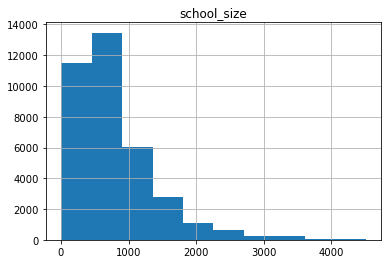

In [19]:
# Plot and see how school_size is distributed:

df.hist(column = 'school_size')
plt.show()

In [20]:
## Help: check how a method works and what parameters it needs
# df.hist?

#### 3. Editing column values

In [21]:
df.school_location.unique()

array(['A city (100 000 to about 1 000 000 people)',
       'A town (15 000 to about 100 000 people)',
       'A small town (3 000 to about 15 000 people)',
       'A large city (with over 1 000 000 people)', None,
       'A village, hamlet or rural area (fewer than 3 000 people)'],
      dtype=object)

In [22]:
# See how this works:

string_school_location = "school location type (description)"

string_school_location.split('(')[0]

'school location type '

In [23]:
string_school_location.split('(')[0][:-1]

'school location type'

In [24]:
# What is this code structure called? Practice it as homework.

[string.split('(')[0][:-1] for string in df.school_location if string!= None][:5]

['A city', 'A city', 'A city', 'A city', 'A city']

In [25]:
# Reassign to new column: 

df["location"] = [string.split('(')[0][:-1] if string!= None else None for string in df.school_location]

In [26]:
# Check how it worked: 

df[["school_location","location"]].sample(5)

,school_location,location
39779,None,None
44397,A large city (with over 1 000 000 people),A large city
42243,A city (100 000 to about 1 000 000 people),A city
27376,A town (15 000 to about 100 000 people),A town
24736,A city (100 000 to about 1 000 000 people),A city


#### 4. Mapping column values

In [27]:
# .value_counts() return a Series containing unique values as its index and
# frequencies as its values, in descending order.

df["early_education"].value_counts()

Attended ECEC for at least two but less than three years      12395
Attended ECEC for at least three but less than four years     11279
Attended ECEC for at least four but less than five years       6811
Attended ECEC for at least one but less than two years         5162
Attended ECEC for at least five but less than six years        3113
Attended ECEC for less than a year                              438
Attended ECEC for at least six but less than seven years        429
Attended ECEC for at least seven but less than eight years       26
Attended ECEC for at least eight years                           11
Name: early_education, dtype: int64

In [28]:
# Mapping column values: 

early_ed = {'No Response': None,
            'Attended ECEC for less than a year': 0,
            'Attended ECEC for at least one but less than two years': 1,
            'Attended ECEC for at least two but less than three years': 2,
            'Attended ECEC for at least three but less than four years': 3,
            'Attended ECEC for at least four but less than five years': 4,
            'Attended ECEC for at least five but less than six years': 5,
            'Attended ECEC for at least six but less than seven years': 6,
            'Attended ECEC for at least seven but less than eight years': 7,
            'Attended ECEC for at least eight years': 8}

df["ECEC_limit"] = df.early_education.map(early_ed)

In [29]:
# After mapping values to the new column:

df["ECEC_limit"].value_counts(dropna=False)

2.0    12395
3.0    11279
NaN    10733
4.0     6811
1.0     5162
5.0     3113
0.0      438
6.0      429
7.0       26
8.0       11
Name: ECEC_limit, dtype: int64

#### 5. Summarize values with `groupby()`
A `groupby()` operation carries out some combination of splitting the data, performing an operation, and combining the results:

* state the Series you want to group by.
* append the operation you want to perform such as .mean(), .sum() or .count()

In [30]:
df_country_m_f = df.groupby(["country", "student_gender"])[["math_score","reading_score"]].median().reset_index()

In [31]:
df_country_m_f

,country,student_gender,math_score,reading_score
0,Argentina,Female,379.999605,423.397460
1,Argentina,Male,400.012300,409.711000
2,Finland,Female,515.323700,553.570130
3,Finland,Male,507.821010,500.784910
4,Japan,Female,525.601345,515.985595
5,Japan,Male,536.411990,499.877410
6,Netherlands,Female,518.592620,497.670090
7,Netherlands,Male,517.775330,464.479310
8,New Zealand,Female,492.636595,527.040530
9,New Zealand,Male,502.882290,499.501190


#### 6. Sort values

In [32]:
df_country_m_f.sort_values(by="math_score", ascending=False)

,country,student_gender,math_score,reading_score
5,Japan,Male,536.411990,499.877410
4,Japan,Female,525.601345,515.985595
6,Netherlands,Female,518.592620,497.670090
7,Netherlands,Male,517.775330,464.479310
2,Finland,Female,515.323700,553.570130
3,Finland,Male,507.821010,500.784910
10,Norway,Female,505.222045,527.865600
9,New Zealand,Male,502.882290,499.501190
11,Norway,Male,499.103000,479.519710
8,New Zealand,Female,492.636595,527.040530


#### 7. Visualization using seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Learn more at: https://seaborn.pydata.org/

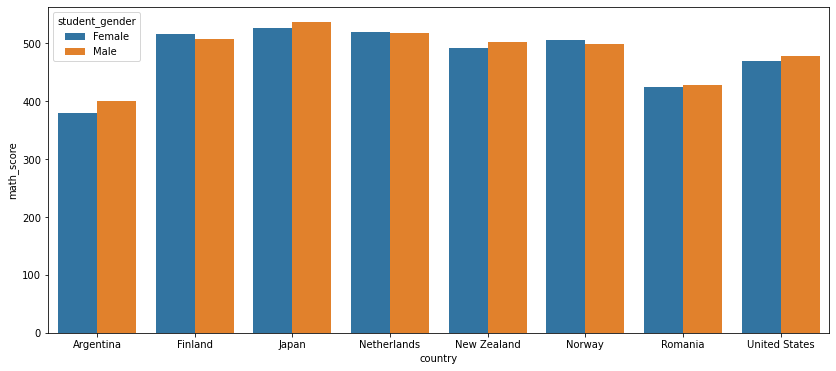

In [33]:
# Bar chart:

f, ax = plt.subplots(figsize=(14, 6))

sns.barplot(x="country", 
            y="math_score", 
            hue = 'student_gender',
            data = df_country_m_f)

plt.show()

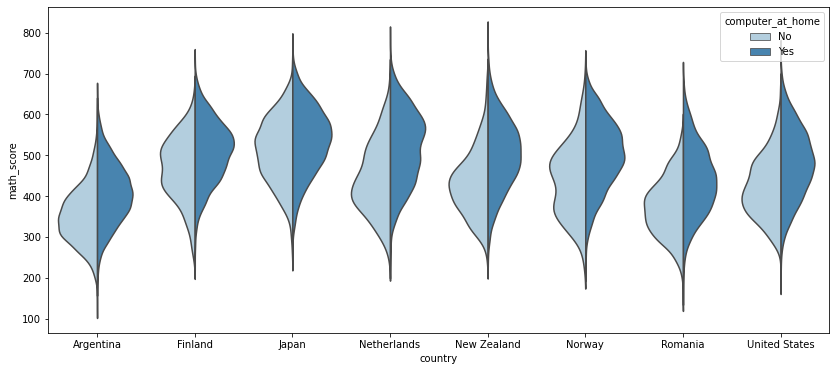

In [34]:
# violinplot

f, ax = plt.subplots(figsize=(14, 6))

sns.violinplot(x="country", 
               y="math_score", 
               hue = 'computer_at_home',
               data = df, 
               palette = "Blues",
               split = True,
               inner = None) # or, None, or "box", or "quartile"
plt.show()

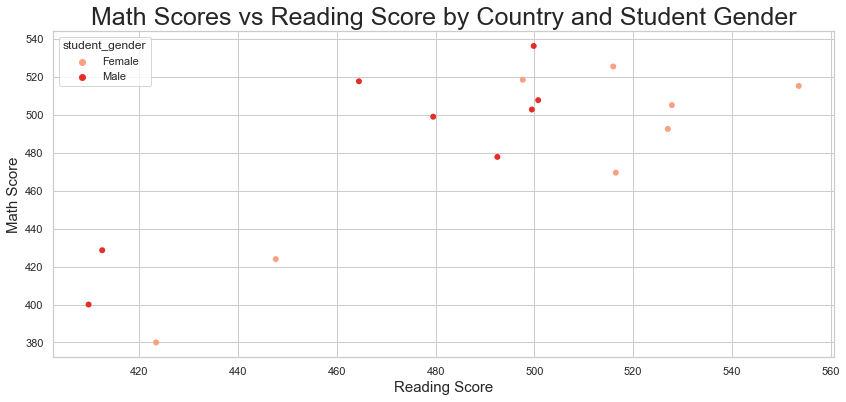

In [35]:
# Scatterplot

sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(14, 6))

sns.scatterplot(x="reading_score", 
                y="math_score",
                palette="Reds",
                linewidth=0,
                data=df_country_m_f,
                hue = "student_gender",
                ax=ax)

# Option to change titles, xlabel, ylabel etc.

plt.title("Math Scores vs Reading Score by Country and Student Gender", size = 25)
plt.xlabel("Reading Score", size = 15)
plt.ylabel("Math Score", size = 15)

plt.show()

# Saving the plot

# plt.savefig('scatterplot.png', dpi=400, bbox_inches='tight')

In [56]:
# Again, to look up the documentation:
# plt.scatter?

### 8. Merging dataframes:

In this section we are going to look at how to merge two dataframes

In [50]:
# Load a dataset with country names, country codes, and latitude / longitude:

countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv'

countries = pd.read_csv(countries_url)

In [51]:
countries.sample(5)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
17,lu,LU,eu,Luxembourg,Luxembourg,Luxemburg,49.815319,6.133352
19,nl,NL,eu,Netherlands,Pays-Bas,Niederlande,52.108118,5.330198
10,de,DE,eu,Germany (including former GDR from 1991),Allemagne (incluant l'ancienne RDA à partir de...,Deutschland (einschließlich der ehemaligen DDR...,51.163825,10.454048
28,tr,TR,non-eu,Turkey,Turquie,Türkei,38.952942,35.439795
9,fr,FR,eu,France,France,Frankreich,46.710994,1.718561


In [52]:
# We have also used .groupby() to get aggregates
# Use .groupby() to create new dataframe for country-level median math scores:

country_math_median = df.groupby("country")["math_score"].median().reset_index()

country_math_median

,country,math_score
0,Argentina,389.339290
1,Finland,512.057620
2,Japan,530.469790
3,Netherlands,518.278020
4,New Zealand,497.699710
5,Norway,502.040590
6,Romania,426.552610
7,United States,473.907545


In [53]:
# In order to merge on a column, we need to ensure that the columns to merge on are identically named in both dataframes

# We have already seen how to rename column names

countries.rename(columns={"country":"iso2:", "name_en":"country"}, inplace=True)

In [60]:
# NOTE: The 'countries' dataframe only lists countries in Europe

# Experiment with how = 'inner' and how = 'right' to understand how pd.merge works

combined = pd.merge(country_math_median, countries, on='country', how='left') 
combined

,country,math_score,iso2:,google_country_code,country_group,name_fr,name_de,latitude,longitude
0,Argentina,389.339290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Finland,512.057620,fi,FI,eu,Finlande,Finnland,64.950159,26.067564
2,Japan,530.469790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Netherlands,518.278020,nl,NL,eu,Pays-Bas,Niederlande,52.108118,5.330198
4,New Zealand,497.699710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Norway,502.040590,no,NO,non-eu,Norvège,Norwegen,64.556460,12.665766
6,Romania,426.552610,ro,RO,eu,Roumanie,Rumänien,45.942611,24.990152
7,United States,473.907545,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Homework: Look up documentation on join options, using merge, join, and concantenate: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html